In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ast
import datetime

In [2]:
metadata = pd.read_csv('movies_dataset/movies_metadata.csv')
credits = pd.read_csv('movies_dataset/credits.csv')

C:\Users\sebye\AppData\Local\conda\conda\envs\poker\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
def get_year(x):
    try:
        year = int(str(x).split('-')[0])
        #Check if year is larger than 1800 since some values do not make sense (a 1 has been found)
        if year < 1800:
            year = np.nan
        return year
    except:
        return np.nan
metadata['year'] = metadata.release_date.map(lambda x: get_year(x))

In [4]:
def toInt(x):
    try:
        return int(x)
    except:
        return 0
metadata['id'] = metadata['id'].apply(toInt)

In [5]:
credits['cast'] = credits['cast'].fillna('[]').apply(ast.literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])
metadata['genres'] = metadata['genres'].fillna('[]').apply(ast.literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

In [6]:
list_genre = {}
for gs in metadata['genres'].values:
    for g in gs:
        if g in list_genre:
            list_genre[g] += 1
        else:
            list_genre[g] = 1
list_genre = {k: v for k, v in sorted(list_genre.items(), reverse=True, key=lambda item: item[1]) if v > 100}

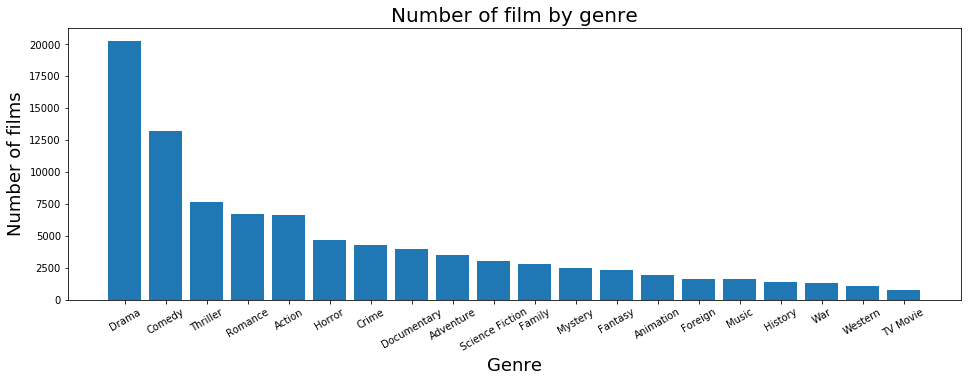

In [7]:
plt.figure(figsize = (16,5))
plt.bar(list_genre.keys(), list_genre.values())
plt.title('Number of film by genre', fontsize = 20)
plt.xlabel('Genre', fontsize = 18)
plt.ylabel('Number of films', fontsize = 18)
plt.xticks(rotation = 30)
plt.show()

In [8]:
Category = {'Drama': 3, 'Comedy': 0, 'Thriller': 1, 'Romance': 3, 'Action': 2, 'Horror': 1, 'Crime': 1, 'Documentary': 4, 'Adventure': 2, 'Science Fiction': 2, 'Family': 4, 'Mystery': 2, 'Fantasy': 3, 'Animation': 4, 'Foreign': 4, 'Music': 4, 'History': 4, 'War': 1, 'Western': 2, 'TV Movie': 4, 'Other': 4}
BigGenre = {0:'Comedy', 1:'Thriller', 2:'Action', 3:'Drama', 4:'Other'}
def reduce_genre(i):
    return lambda x: (i in [Category[g] for g in x if g in Category])

In [10]:
metadata['isComedy'] = metadata['genres'].apply(reduce_genre(0))
metadata['isThriller'] = metadata['genres'].apply(reduce_genre(1))
metadata['isAction'] = metadata['genres'].apply(reduce_genre(2))
metadata['isDrama'] = metadata['genres'].apply(reduce_genre(3))

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,tagline,title,video,vote_average,vote_count,year,isComedy,isThriller,isAction,isDrama
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[Animation, Comedy, Family]",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,NaN,Toy Story,False,7.7,5415.0,1995.0,True,False,False,False
1,False,NaN,65000000,"[Adventure, Fantasy, Family]",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,1995.0,False,False,True,True
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[Romance, Comedy]",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,1995.0,True,False,False,True
3,False,NaN,16000000,"[Comedy, Drama, Romance]",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0,1995.0,True,False,False,True
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,[Comedy],NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0,1995.0,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45461,False,NaN,0,"[Drama, Family]",http://www.imdb.com/title/tt6209470/,439050,tt6209470,fa,رگ خواب,Rising and falling between a man and woman.,...,Rising and falling between a man and woman,Subdue,False,4.0,1.0,NaN,False,False,False,True
45462,False,NaN,0,[Drama],NaN,111109,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,...,NaN,Century of Birthing,False,9.0,3.0,2011.0,False,False,False,True
45463,False,NaN,0,"[Action, Drama, Thriller]",NaN,67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",...,A deadly game of wits.,Betrayal,False,3.8,6.0,2003.0,False,True,True,True
45464,False,NaN,0,[],NaN,227506,tt0008536,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",...,NaN,Satan Triumphant,False,0.0,0.0,1917.0,False,False,False,False


In [11]:
list_big_genre = {'Comedy': 0, 'Thriller': 0, 'Drama': 0, 'Action': 0}
for index, _ in enumerate(metadata['genres'].values):
    if metadata['isComedy'][index]:
        list_big_genre['Comedy'] += 1
    if metadata['isThriller'][index]:
        list_big_genre['Thriller'] += 1
    if metadata['isDrama'][index]:
        list_big_genre['Drama'] += 1
    if metadata['isAction'][index]:
        list_big_genre['Action'] += 1
print(list_big_genre)

{'Comedy': 13182, 'Thriller': 13761, 'Drama': 23977, 'Action': 12715}


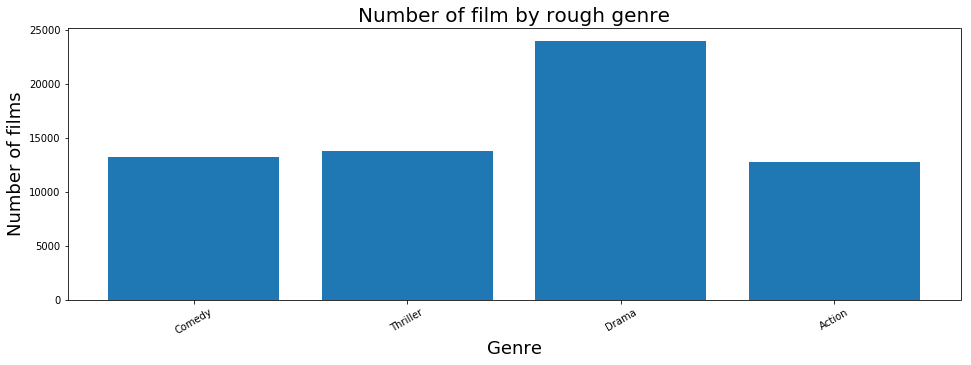

In [12]:
plt.figure(figsize = (16,5))
plt.bar(list_big_genre.keys(), list_big_genre.values())
plt.title('Number of film by rough genre', fontsize = 20)
plt.xlabel('Genre', fontsize = 18)
plt.ylabel('Number of films', fontsize = 18)
plt.xticks(rotation = 30)
plt.show()

In [13]:
annual_metadata = metadata[['id','year','isComedy','isThriller','isDrama','isAction']].sort_values('id')
cast_data = credits[['id','cast']].sort_values('id')

In [14]:
annual_merged = pd.merge_ordered(annual_metadata,cast_data,on='id').sort_values('year')

In [15]:
annual_merged

,id,year,isComedy,isThriller,isDrama,isAction,cast
41578,315946,1874.0,False,False,False,False,[]
36101,194079,1878.0,False,False,False,False,"[Sallie Gardner, Gilbert Domm]"
45190,426903,1883.0,False,False,False,False,[]
34384,159897,1887.0,False,False,False,False,[]
29091,96882,1888.0,False,False,False,False,[Adolphe Le Prince]
...,...,...,...,...,...,...,...
45440,448290,NaN,False,True,False,True,[]
45450,449131,NaN,False,True,True,False,"[Evgeniy Stychkin, Denis Burgazliev, Aleksandr..."
45472,452922,NaN,False,False,False,False,[John Shrapnel]
45481,455027,NaN,False,False,False,False,[]


In [16]:
def filterByWindow(df, begin, end, isGenre):
    tmp = np.logical_and(df['year']>=begin,df['year'] < end)
    tmp = np.logical_and(tmp,df[isGenre])
    return df[tmp]

In [22]:
FILE = 'career_race_Thriller.csv'
try:
    with open( FILE, 'w') as f:
        f.seek(0)
        f.truncate()
        f.write("name,value,year,lastValue,rank\n")
except:
    print("Error initializing")
prev = ["","","","","","","","","",""]
for year in range(1900, 2009):
    df = filterByWindow(annual_merged,year,year+10,'isThriller')
    dico = {}
    for cast in df['cast'].values:
        for actor in cast:
            if actor in dico:
                dico[actor] += 1
            else:
                dico[actor] = 1
    top = sorted(dico.items(), reverse=True, key=lambda item: item[1])[0:5]
    try:
        with open( FILE, 'a') as f:
            for index, (name, count) in enumerate(top):
                f.write(str(name) + ',' + str(count) + ',' + str(year+10)+',')
                if name in prev:
                    f.write(str(prev.index(name)))
                elif prev[0] == "":
                    f.write(str(index+1))
                else:
                    f.write('0')
                f.write(',' + str(index+1)+'\n')
    except:
        print("Error while writing")
        print(top)
        print(year)
    for index, (name, count) in enumerate(top):
        prev[index] = name
        
        

In [39]:
best = {}
for year in range(1900, 2009):
    df = filterByWindow(annual_merged,year,year+10,'isAction')
    dico = {}
    for cast in df['cast'].values:
        for actor in cast:
            if actor in dico:
                dico[actor] += 1
            else:
                dico[actor] = 1
    top = sorted(dico.items(), reverse=True, key=lambda item: item[1])[0:5]
    for (name, _) in top:
        if not name in best:
            best[name] = [year]
        else:
            best[name].append(year)
best_sorted = {k: v for k, v in sorted(best.items(), reverse=True, key=lambda item: len(item[1])) if len(v) > 10}
best_sorted

{'John Wayne': [1923,
  1924,
  1925,
  1926,
  1927,
  1928,
  1929,
  1930,
  1931,
  1932,
  1933,
  1934,
  1935,
  1936,
  1939,
  1940,
  1941,
  1942,
  1943,
  1944,
  1945,
  1946,
  1947,
  1948,
  1951,
  1953,
  1954,
  1955,
  1956,
  1957,
  1958,
  1959,
  1960,
  1961,
  1962],
 'Jackie Chan': [1969,
  1970,
  1971,
  1972,
  1973,
  1974,
  1975,
  1976,
  1977,
  1978,
  1979,
  1980,
  1981,
  1982,
  1983,
  1984,
  1985,
  1990,
  1991,
  1992,
  1995,
  1996,
  1997,
  1998,
  1999],
 'Christopher Lee': [1956,
  1957,
  1958,
  1959,
  1960,
  1961,
  1962,
  1963,
  1964,
  1965,
  1966,
  1967,
  1968,
  1969,
  1970,
  1971,
  1972,
  1973,
  1974],
 'Douglas Fairbanks': [1907,
  1908,
  1909,
  1910,
  1911,
  1912,
  1913,
  1914,
  1915,
  1916,
  1917,
  1918,
  1919,
  1920,
  1921,
  1922,
  1923],
 'Samuel L. Jackson': [1992,
  1993,
  1994,
  1995,
  1996,
  1997,
  1998,
  1999,
  2000,
  2001,
  2002,
  2003,
  2004,
  2005,
  2006,
  2007,
  2008],
 

In [28]:
FILE = 'span.csv'
try:
    with open( FILE, 'w') as f:
        f.seek(0)
        f.truncate()
        f.write("actor,start,end,genre\n")
except:
    print("Error initializing")

In [40]:
try:
    with open( FILE, 'a') as f:
        for actor in best_sorted:
            f.write(str(actor) + ',' + str(best_sorted[actor][0]) + ',' + str(best_sorted[actor][-1]) +',')
            f.write("Action"+'\n')
except:
    print("Error while writing")